# Task 1: Student Score Prediction

Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # polynommial features(extended features)
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import numpy as np


Load Dataset

In [2]:
data = pd.read_csv('/Users/ahmedyahia/Downloads/welcometotheelevvointernshipprogram/datasets/StudentPerformanceFactors.csv')
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


Understaning Data

In [3]:
data.info()
data.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

(6607, 20)

Data Summary

In [4]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


Missing Data (Data Cleaning)

In [5]:
data.isna().sum().sum()
print(f'Missing data percentage: {100 - (data.shape[0]-data.isna().sum().sum())/data.shape[0]*100:.2f}%')

Missing data percentage: 3.56%


In [6]:
data.dropna(axis=0,inplace=True)

data.shape

(6378, 20)

Data visualisation

In [7]:
numerical_data = data.select_dtypes(include=['number']).columns.tolist()
print("Numerical Columns:", len(numerical_data))
categorical_data = data.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", len(categorical_data))

Numerical Columns: 7
Categorical Columns: 13


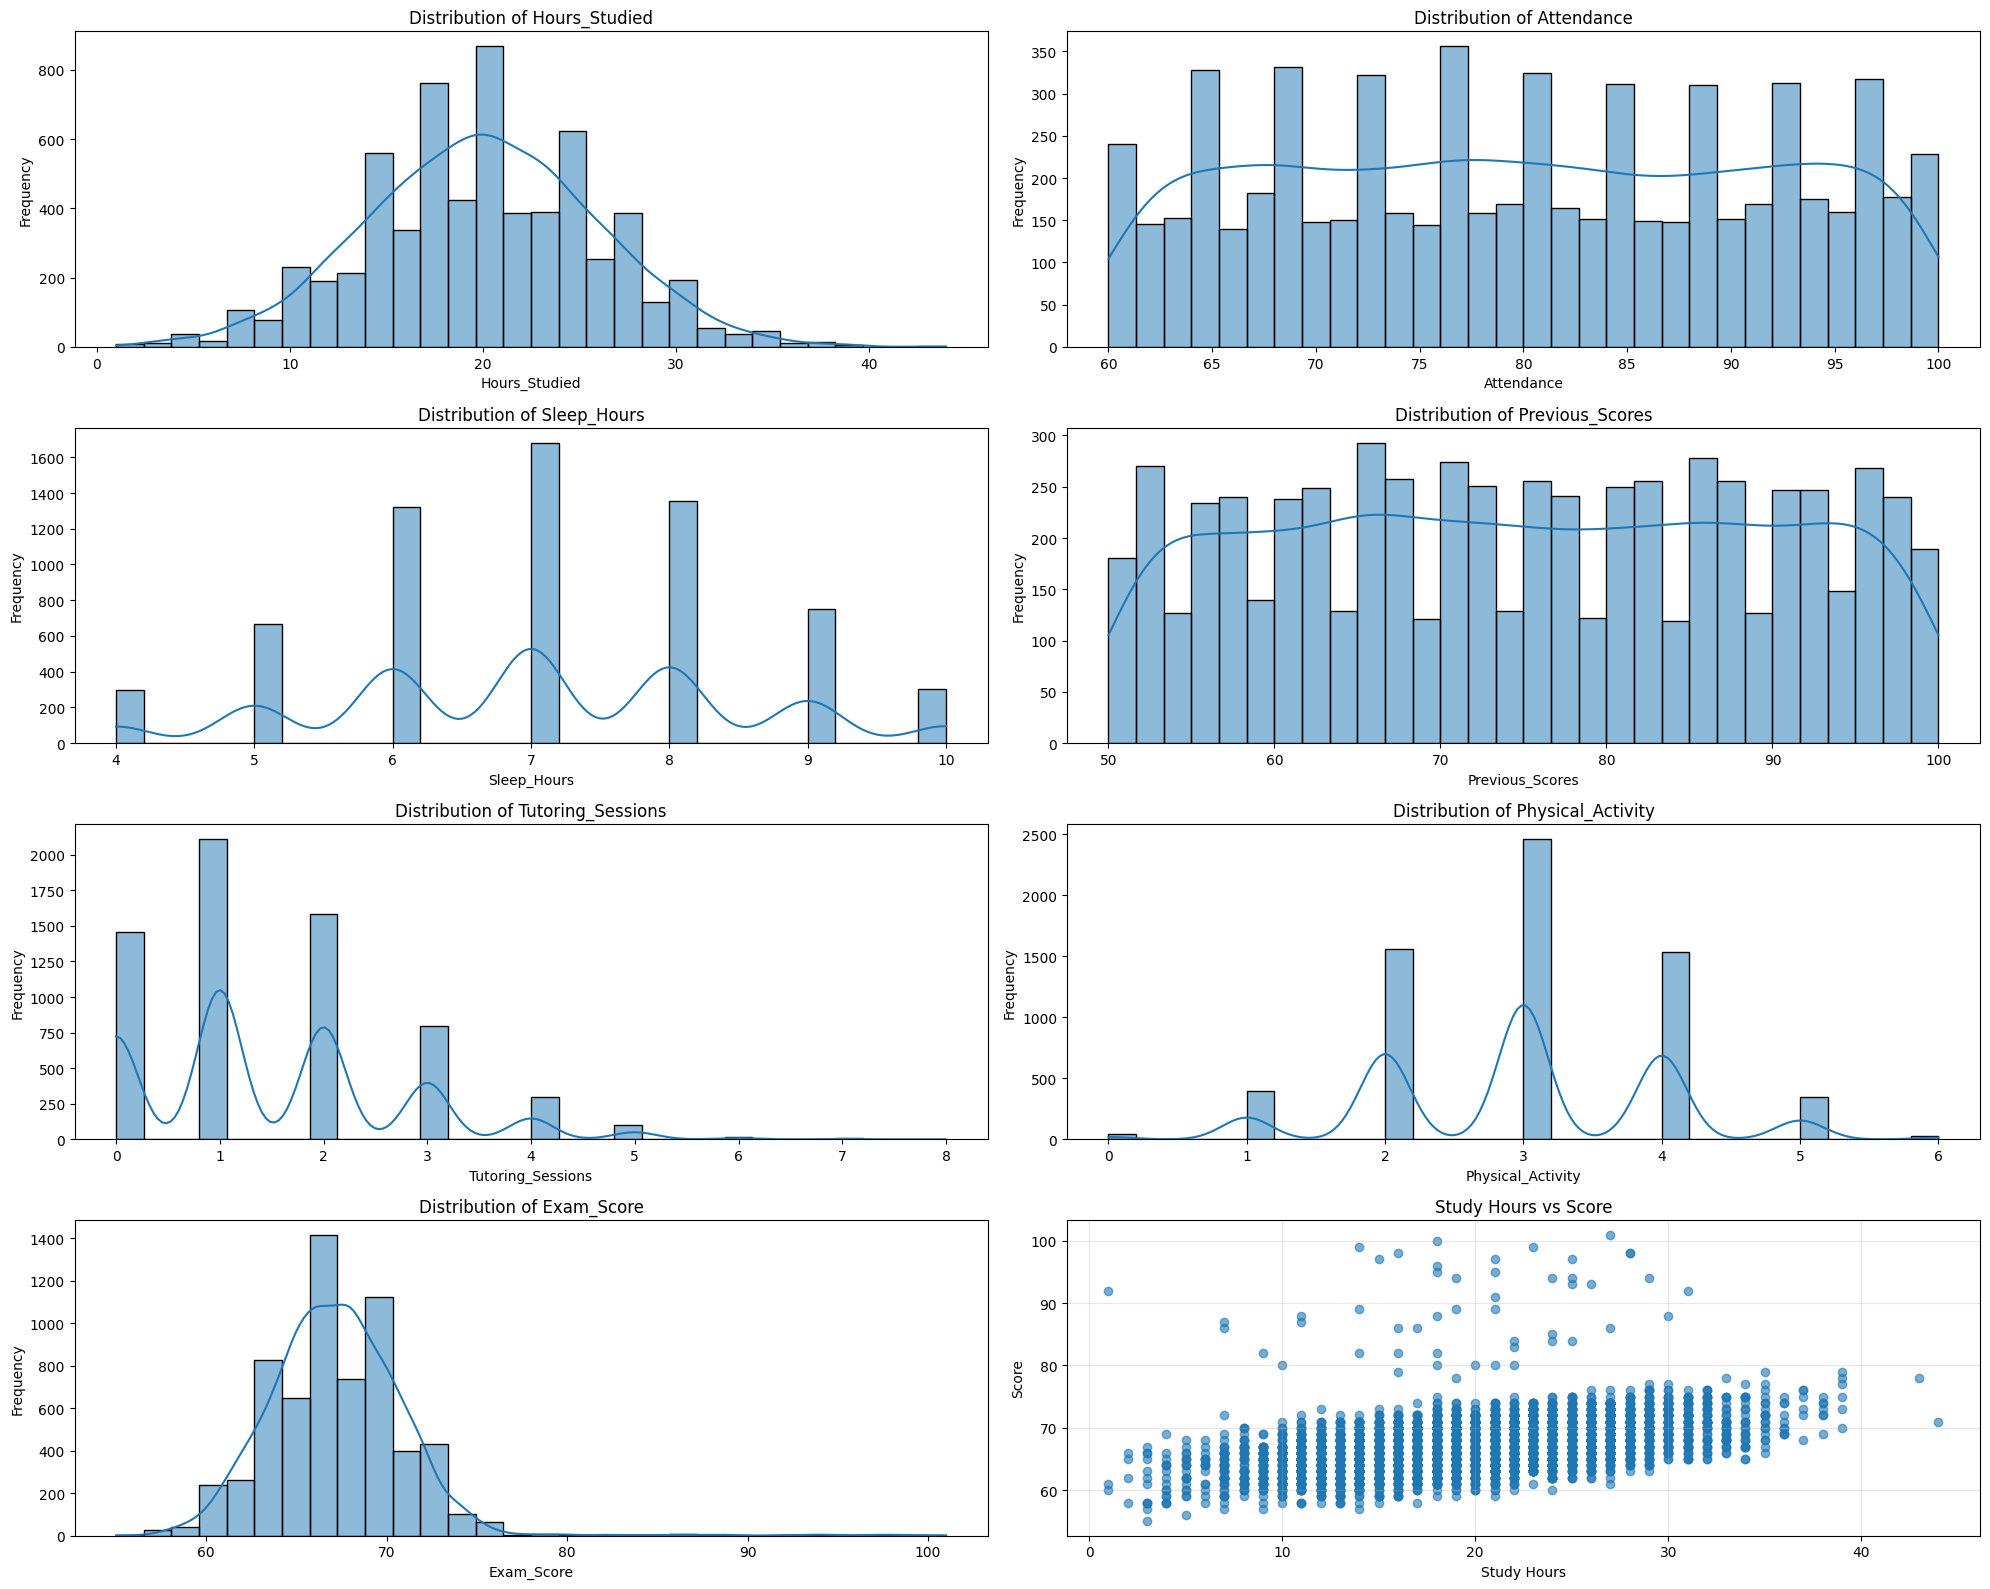

In [8]:
fig, ax = plt.subplots(4,2, figsize=(20, 16))
ax = ax.flatten()  # Flatten to 1D for easy indexing
# 1. Scatter plot of study hours vs score
ax[-1].scatter(data['Hours_Studied'], data['Exam_Score'], alpha=0.6)
ax[-1].set_xlabel('Study Hours')
ax[-1].set_ylabel('Score')
ax[-1].set_title('Study Hours vs Score')
ax[-1].grid(True, alpha=0.3)
# Distribution Plots
for i, col in enumerate(numerical_data):
    sns.histplot(data[col], bins=30, kde=True, ax=ax[i])
    ax[i].set_title(f'Distribution of {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

/var/folders/f0/_2m5m3_d0b502chmqj_qdrb80000gn/T/ipykernel_1136/3727309840.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, ax=ax[i], palette=palette)
/var/folders/f0/_2m5m3_d0b502chmqj_qdrb80000gn/T/ipykernel_1136/3727309840.py:5: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.countplot(data=data, x=col, ax=ax[i], palette=palette)
/var/folders/f0/_2m5m3_d0b502chmqj_qdrb80000gn/T/ipykernel_1136/3727309840.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, ax=ax[i], palette=palette)
/var/folders/f0/_2m5m3_d0b502chmqj_qdrb80000gn/T/ipykernel_1136/3727309840.py:5: UserWarning: The palette list has

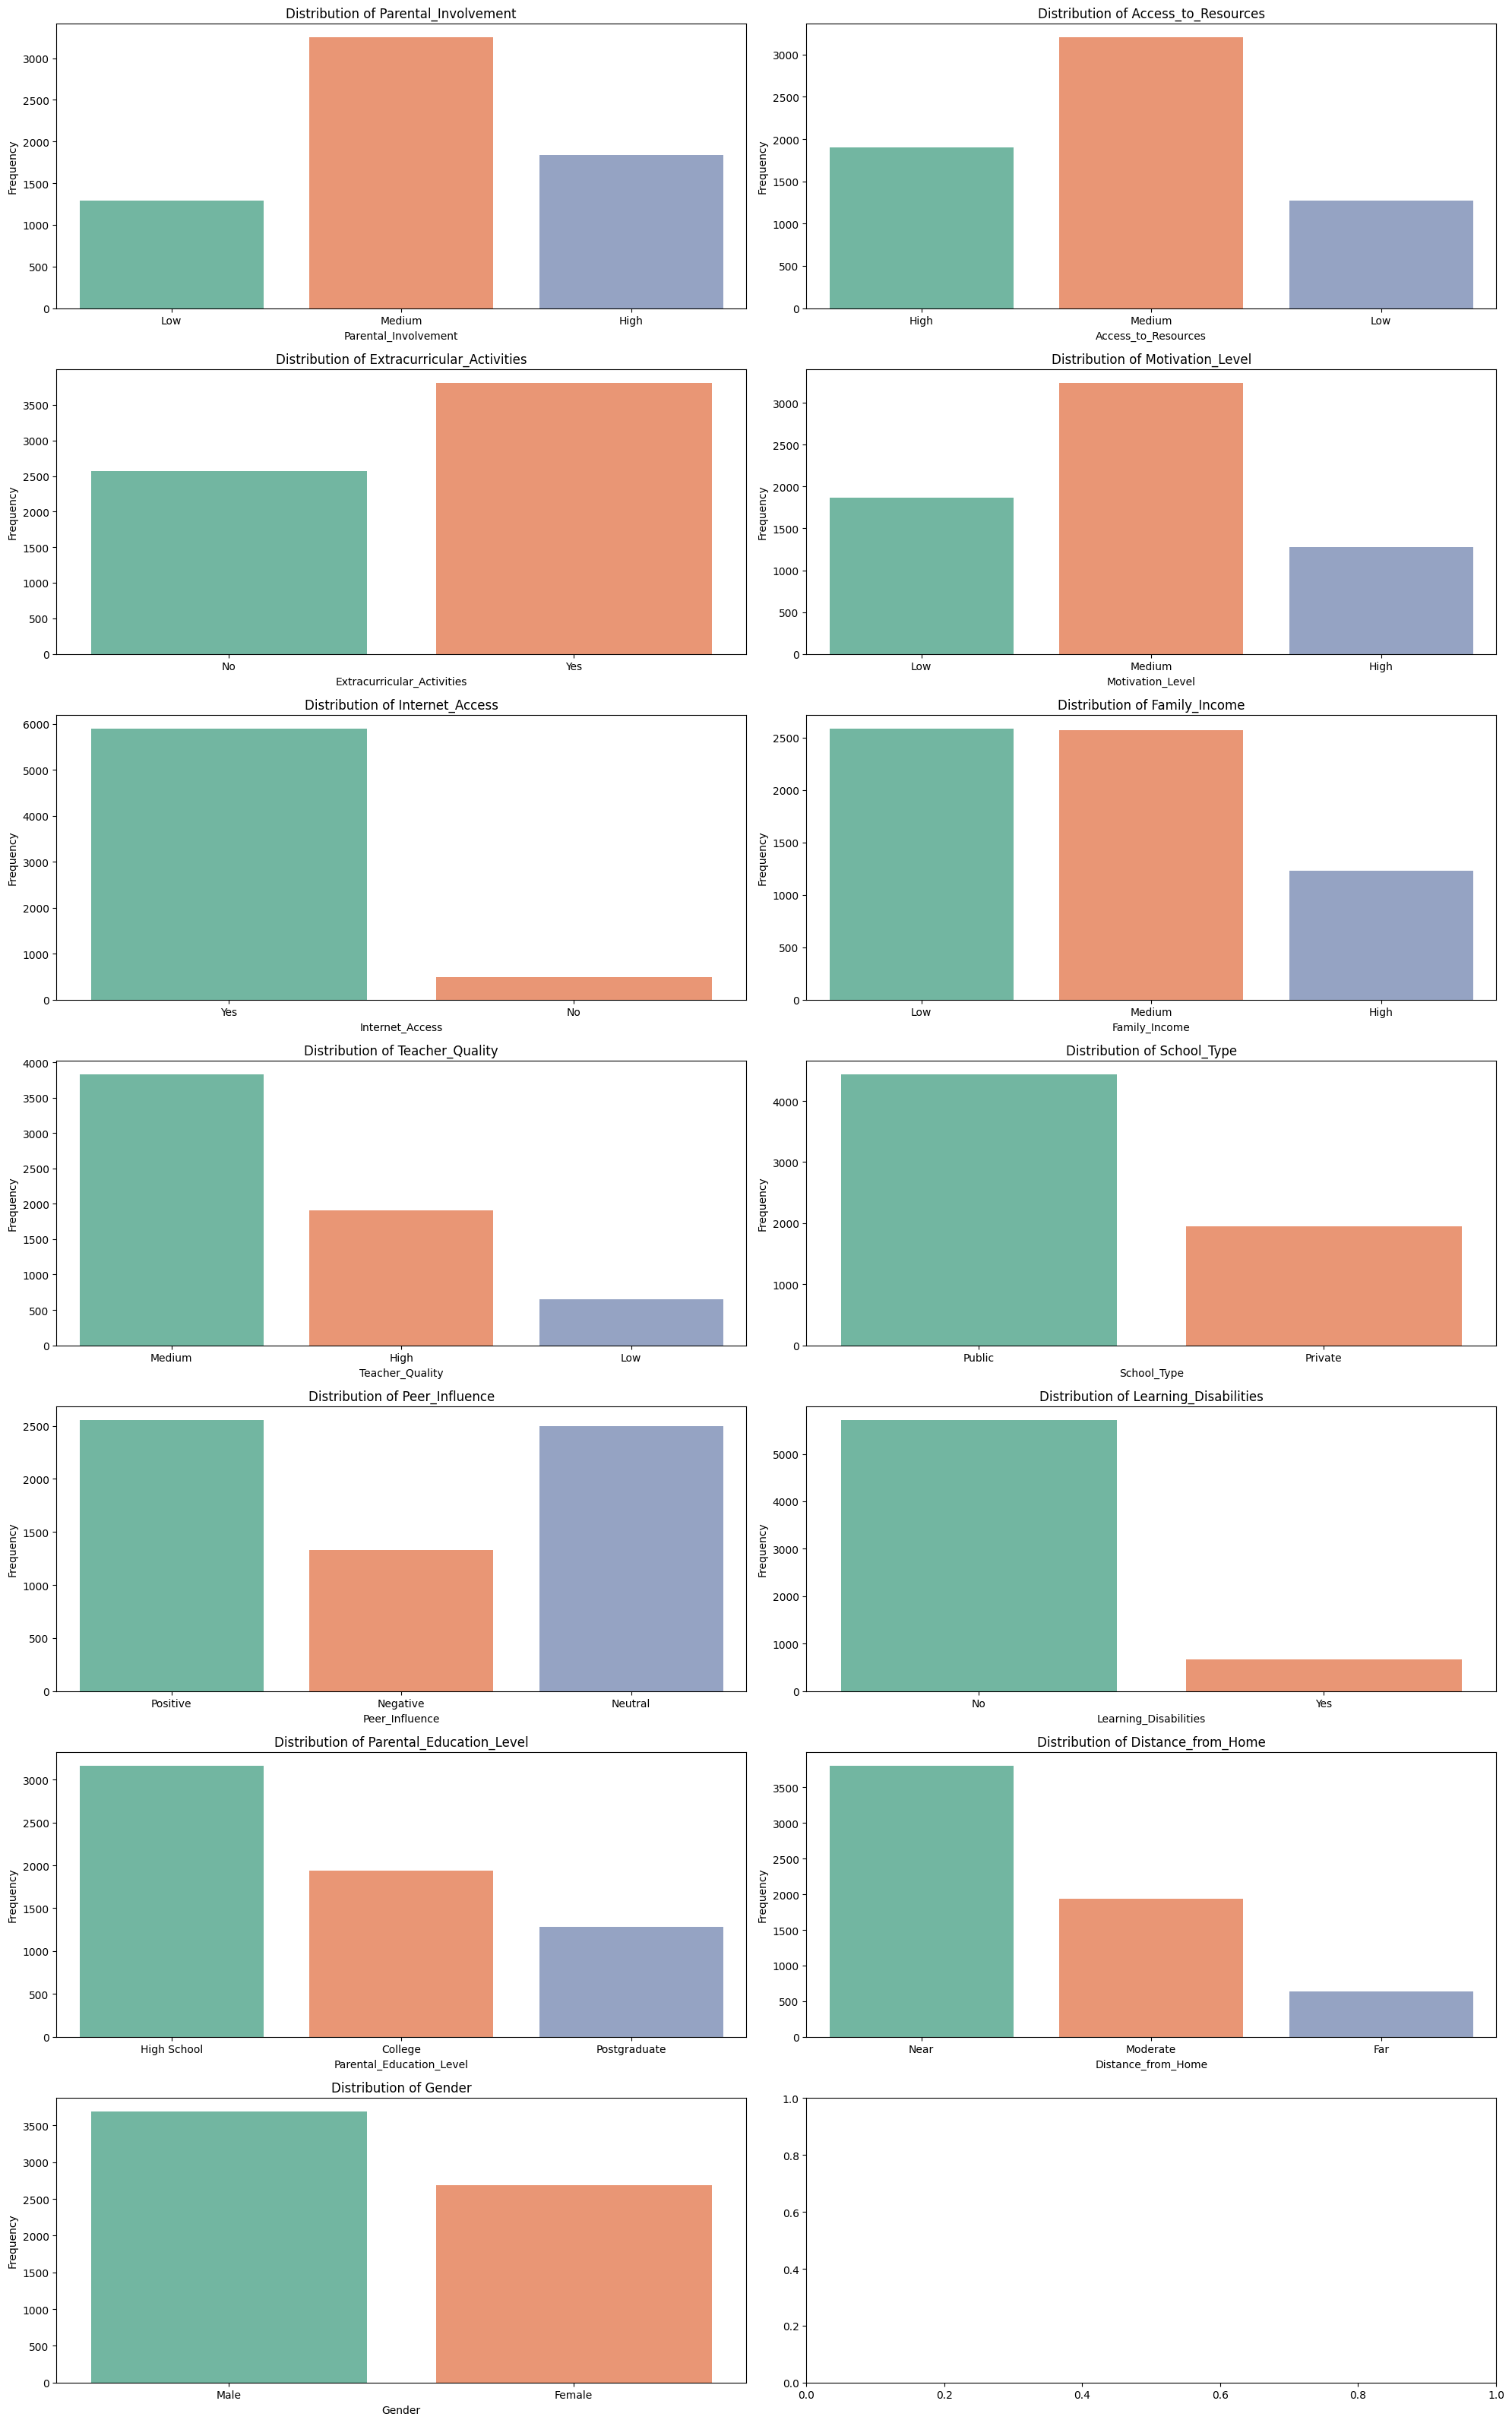

In [9]:
fig, ax = plt.subplots(7,2, figsize=(20, 32))
ax = ax.flatten()  # Flatten to 1D for easy indexing
palette = sns.color_palette('Set2')
for i, col in enumerate(categorical_data):
    sns.countplot(data=data, x=col, ax=ax[i], palette=palette)
    ax[i].set_title(f'Distribution of {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Convert Categorical to numerical

In [10]:
le = LabelEncoder()
for col in categorical_data:
    data[col] = le.fit_transform(data[col])
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70


Identify outliers

Number of outlier rows using IQR: 542


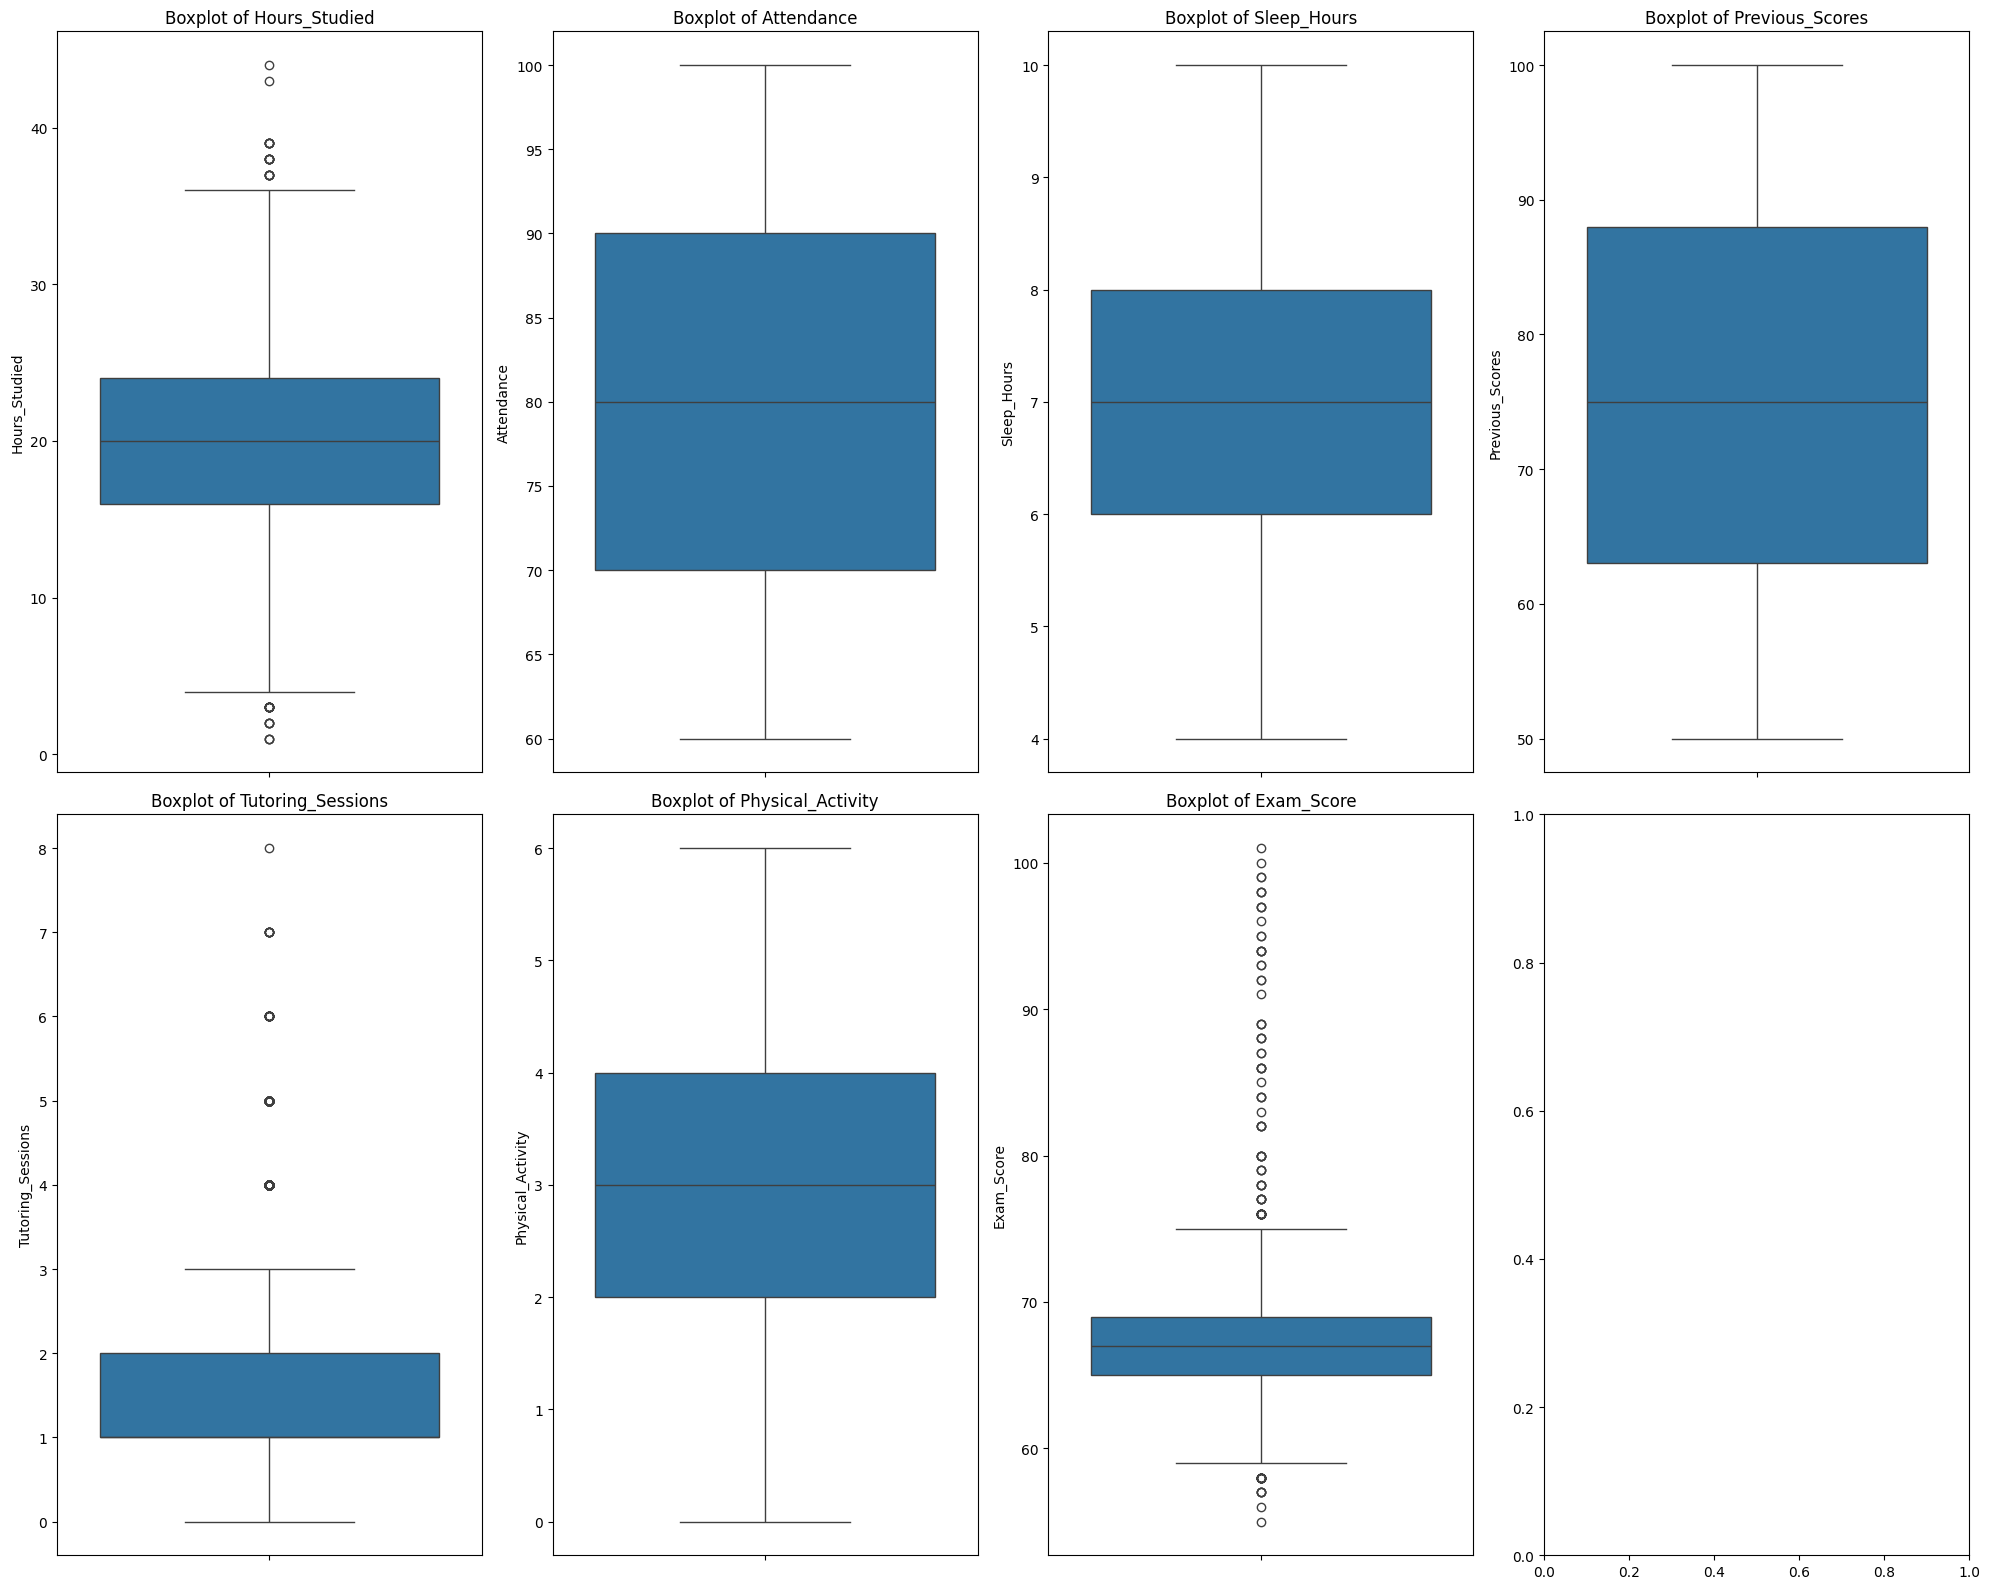

In [11]:
Q1 = data[numerical_data].quantile(0.25)
Q3 = data[numerical_data].quantile(0.75)
IQR = Q3 - Q1

outlier_condition = ((data[numerical_data] < (Q1 - 1.5 * IQR)) | (data[numerical_data] > (Q3 + 1.5 * IQR)))
outliers_iqr = outlier_condition.any(axis=1)
print(f'Number of outlier rows using IQR: {np.sum(outliers_iqr)}')

# Create grid of subplots
fig, ax = plt.subplots(2, 4, figsize=(20, 16))
ax = ax.flatten()

# Generate one boxplot per numerical feature
for i, col in enumerate(numerical_data):
    sns.boxplot(y=data[col], ax=ax[i])
    ax[i].set_title(f'Boxplot of {col}')
    ax[i].set_ylabel(col)

# # Hide any unused subplots
# for j in range(len(numerical_data), len(ax)):
#     fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

Data Cleaning

In [12]:
data_cleaned = data[~outliers_iqr]  
data_cleaned.shape

(5836, 20)

Data Splitting

In [13]:
# Original Data
X = data.drop(columns=['Exam_Score'])
y = data['Exam_Score']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Cleaned Data
Xo = data_cleaned.drop(columns=['Exam_Score'])
yo = data_cleaned['Exam_Score']
X_train_o,X_test_o,y_train_o,y_test_o = train_test_split(Xo,yo,test_size=0.3,random_state=42)

# Polynomial Features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X) # convert the original feature to polynomial feature
X_train_poly,X_test_poly,y_train_poly,y_test_poly = train_test_split(X_poly,y,test_size=0.3,random_state=42)

# Polynomial Cleaned Features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
Xo_poly = poly_features.fit_transform(Xo) # convert the original feature to polynomial feature
Xo_train_poly,Xo_test_poly,yo_train_poly,y0_test_poly = train_test_split(Xo_poly,yo,test_size=0.3,random_state=42)


Model

In [14]:
linear_model = LinearRegression()
poly_model = LinearRegression()
c_linear_model = LinearRegression()
c_poly_model = LinearRegression()

# Original features
linear_model.fit(X_train,y_train)
# Polynomial features training
poly_model.fit(X_train_poly,y_train_poly)

# Original Cleaned features
c_linear_model.fit(X_train_o,y_train_o)
# Polynomial Cleaned features training
c_poly_model.fit(Xo_train_poly,yo_train_poly)


LinearRegression()

Predictions

In [15]:
# Make predictions
# 1. Linear Model
y_pred_linear = linear_model.predict(X_test)
y_train_pred_linear = linear_model.predict(X_train)

# Model coefficients
print(f"Linear Model Coefficients:")
print(f"Intercept: {linear_model.intercept_:.4f}")
print(f"Coefficient(s): {linear_model.coef_}")

# Evaluate model performance
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f"\nLinear Regression Performance:")
print(f"Mean Squared Error: {mse_linear:.4f}")
print(f"Root Mean Squared Error: {rmse_linear:.4f}")
print(f"R² Score: {r2_linear:.4f}")

# 2. Poly Model
y_pred_poly = poly_model.predict(X_test_poly)
y_train_pred_poly = poly_model.predict(X_train_poly)

# Model coefficients
print(f"Polynomial Model Coefficients:")
print(f"Intercept: {poly_model.intercept_:.4f}")
# print(f"Coefficients: {poly_model.coef_}")

# Evaluate polynomial model performance
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"\nPolynomial Regression Performance:")
print(f"Mean Squared Error: {mse_poly:.4f}")
print(f"Root Mean Squared Error: {rmse_poly:.4f}")
print(f"R² Score: {r2_poly:.4f}")

# 3. Linear Model (Cleaned Data)
y_pred_linear_cleaned = c_linear_model.predict(X_test_o)
y_train_pred_linear_cleaned = c_linear_model.predict(X_train_o)

# Model coefficients
print(f"Linear Model Coefficients:")
print(f"Intercept: {c_linear_model.intercept_:.4f}")
print(f"Coefficient: {c_linear_model.coef_}")
# print(f"Equation: Score = {c_linear_model.intercept_:.4f} + {c_linear_model.coef_[0]:.4f} * Study_Hours")

# Evaluate model performance
c_mse_linear = mean_squared_error(y_test_o, y_pred_linear_cleaned)
c_rmse_linear = np.sqrt(c_mse_linear)
c_r2_linear = r2_score(y_test_o, y_pred_linear_cleaned)
print(f"\nLinear Regression Performance:")
print(f"Mean Squared Error: {c_mse_linear:.4f}")
print(f"Root Mean Squared Error: {c_rmse_linear:.4f}")
print(f"R² Score: {c_r2_linear:.4f}")

# 4. Poly Model (Cleaned Data)
y_pred_poly_cleaned = c_poly_model.predict(Xo_test_poly)
y_train_pred_poly_cleaned = c_poly_model.predict(Xo_train_poly)

print("Polynomial Model Coefficients:")
print(f"Intercept: {c_poly_model.intercept_:.4f}")
# print(f"Coefficients: {c_poly_model.coef_}")

# Correct metrics
c_mse_poly = mean_squared_error(y_test_o, y_pred_poly_cleaned)
c_rmse_poly = np.sqrt(c_mse_poly)
c_r2_poly = r2_score(y_test_o, y_pred_poly_cleaned)

print("\nPolynomial Regression Performance (Cleaned Data):")
print(f"Mean Squared Error: {c_mse_poly:.4f}")
print(f"Root Mean Squared Error: {c_rmse_poly:.4f}")
print(f"R² Score: {c_r2_poly:.4f}")





Linear Model Coefficients:
Intercept: 40.2689
Coefficient(s): [ 0.29347777  0.19665571 -0.40802851 -0.42062314  0.54662415 -0.02564167
  0.04746304 -0.1765222   0.84971297  0.47297644 -0.16221458 -0.26104655
  0.01421292  0.51397724  0.17740897 -0.83161443  0.1782831   0.49032718
  0.00218054]

Linear Regression Performance:
Mean Squared Error: 5.0826
Root Mean Squared Error: 2.2545
R² Score: 0.6678
Polynomial Model Coefficients:
Intercept: 48.9768

Polynomial Regression Performance:
Mean Squared Error: 4.3004
Root Mean Squared Error: 2.0737
R² Score: 0.7189
Linear Model Coefficients:
Intercept: 39.2529
Coefficient: [ 0.29399355  0.19705085 -0.40775756 -0.3916267   0.47433121  0.02194793
  0.04796115 -0.13909458  0.99174174  0.51256826 -0.12560052 -0.20728075
 -0.02965125  0.51860807  0.2174263  -1.06831953  0.17529829  0.51708159
 -0.03297055]

Linear Regression Performance:
Mean Squared Error: 1.2553
Root Mean Squared Error: 1.1204
R² Score: 0.8750
Polynomial Model Coefficients:
Inte

Comparison

In [16]:
# Compare models
print("\n=== Model Comparison ===")
comparison_df = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'R²'],
    'Linear Regression': [mse_linear, rmse_linear, r2_linear],
    'Polynomial Regression': [mse_poly, rmse_poly, r2_poly],
    'Linear Regression (Cleaned)': [c_mse_linear, c_rmse_linear, c_r2_linear],
    'Polynomial Regression (Cleaned)': [c_mse_poly, c_rmse_poly, c_r2_poly],
})

print(comparison_df.round(4))



=== Model Comparison ===
  Metric  Linear Regression  Polynomial Regression  \
0    MSE             5.0826                 4.3004   
1   RMSE             2.2545                 2.0737   
2     R²             0.6678                 0.7189   

   Linear Regression (Cleaned)  Polynomial Regression (Cleaned)  
0                       1.2553                           0.1055  
1                       1.1204                           0.3249  
2                       0.8750                           0.9895  


Result visualization

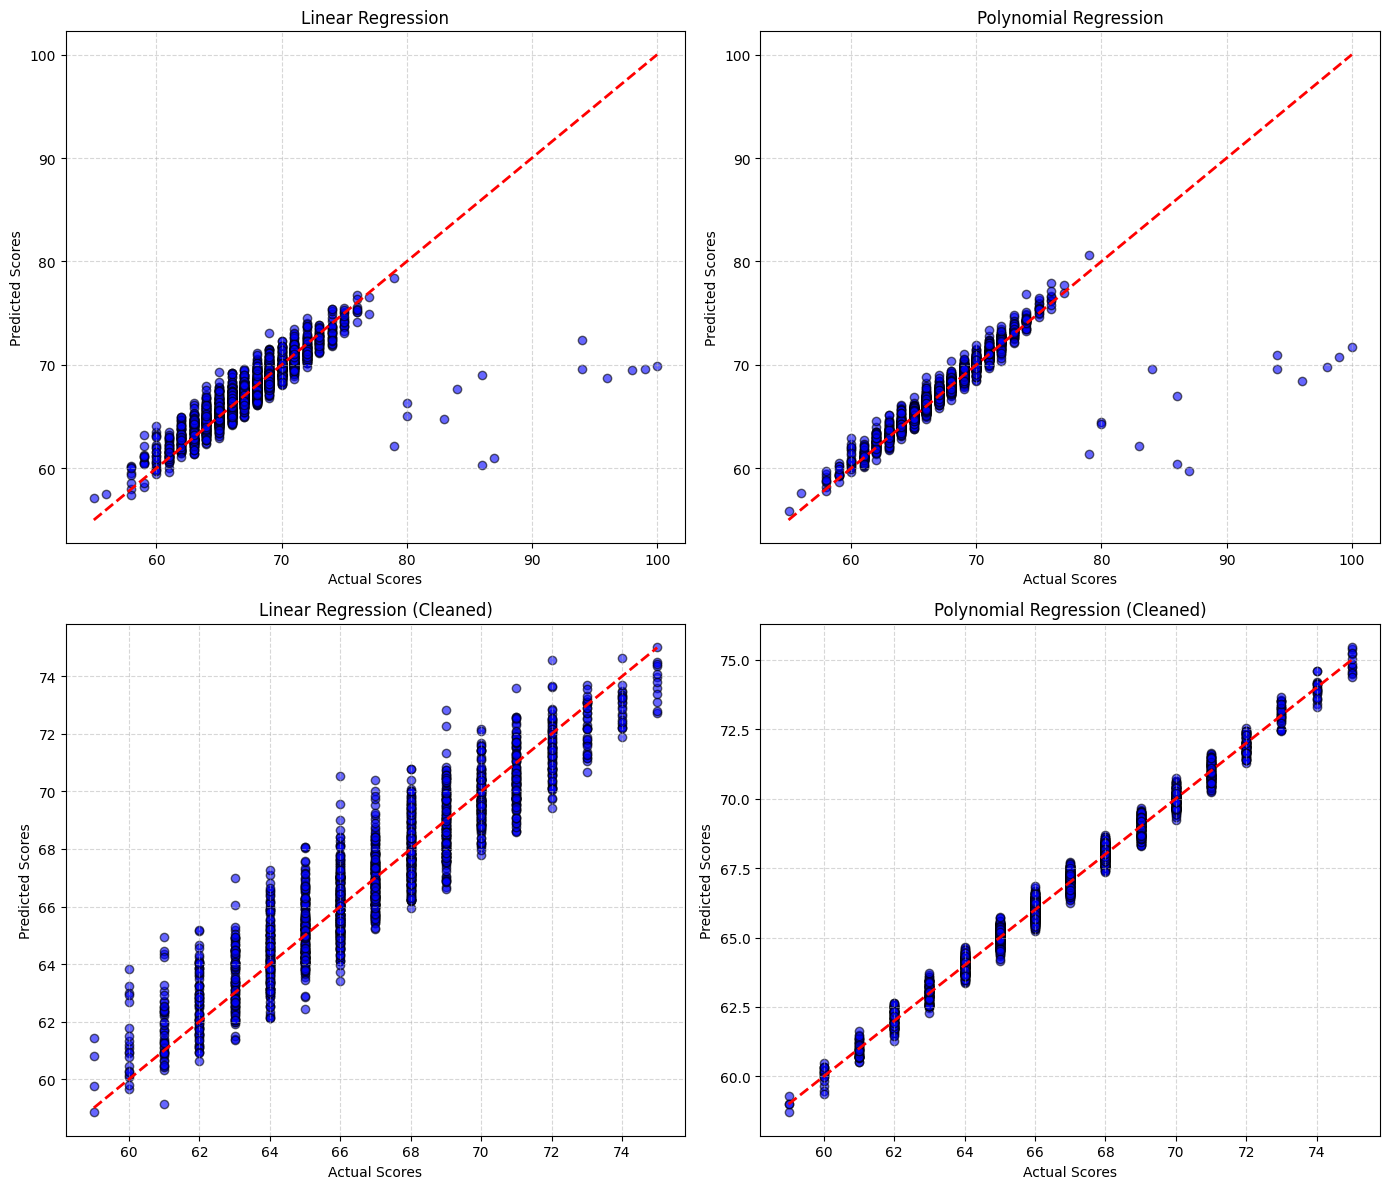

In [17]:
# Scatter plots of Actual vs Predicted
fig, ax = plt.subplots(2, 2, figsize=(14, 12))
ax = ax.flatten()

models = [
    ("Linear Regression", y_test, y_pred_linear),
    ("Polynomial Regression", y_test, y_pred_poly),
    ("Linear Regression (Cleaned)", y_test_o, y_pred_linear_cleaned),
    ("Polynomial Regression (Cleaned)", y_test_o, y_pred_poly_cleaned),
]

for i, (name, y_true, y_pred) in enumerate(models):
    ax[i].scatter(y_true, y_pred, alpha=0.6, color="blue", edgecolor="k")
    ax[i].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], "r--", lw=2)  # reference line
    ax[i].set_title(name)
    ax[i].set_xlabel("Actual Scores")
    ax[i].set_ylabel("Predicted Scores")
    ax[i].grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


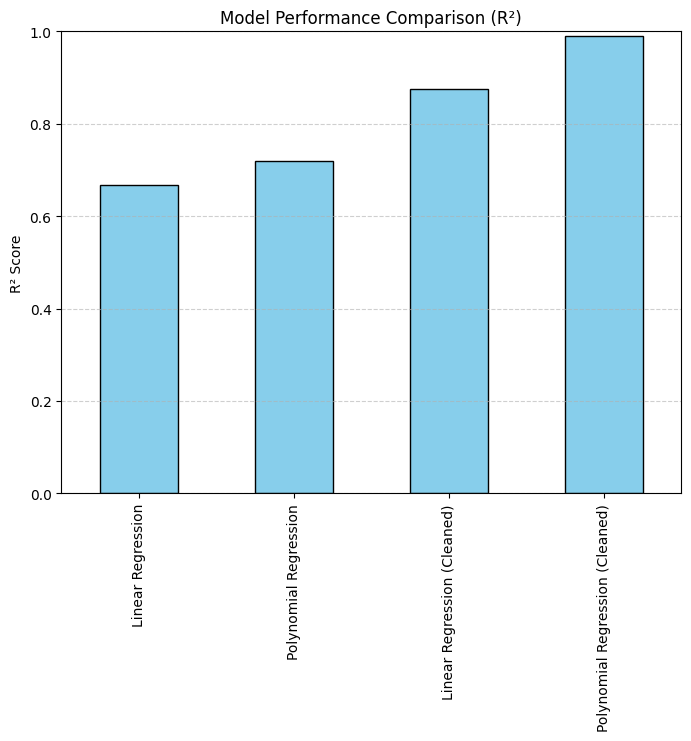

In [18]:
plt.figure(figsize=(8, 6))
comparison_df.set_index("Metric").T['R²'].plot(kind="bar", color="skyblue", edgecolor="black")
plt.ylabel("R² Score")
plt.title("Model Performance Comparison (R²)")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()